# Lipkin Model

Consider a two level system with the lower energy state ($\sigma = -1$) having an energy of $-\epsilon/2$ and the upper energy state ($\sigma=1$) having an energy of $\epsilon/2$.
Now, consider a another system with $\Omega \in \mathbb{Z}^+$ copies of this two level system.

This gives a system with two quantum numbers, $\sigma \in \{-1,1\}$, and $m \in \{1,2,\dots,\Omega\}$.
In Fock space, the Hamiltonian for this system is
$$\begin{align}
	\hat{H} &= \frac{1}{2} \epsilon \sum_{m\sigma}\sigma a_{m\sigma}^\dagger a_{m\sigma}- \frac{1}{2}V\sum_{mm'\sigma}a_{m\sigma}^\dagger a_{m'\sigma}^\dagger a_{m'-\sigma}a_{m-\sigma}.
\end{align}$$
The $V$ term here is the two particle interaction term between adjacent particles.

## Quasi-spin Operators

One can consider the operators
$$\begin{align}
	\hat{K}_3 &= \frac{1}{2} \sum_{m=1}^\Omega (a_{m+}^\dagger a_{m+}-a_{m-}^\dagger a_{m-}),\\
	\hat{K}_+ &= \sum_{m=1}^\Omega a_{m+}^\dagger a_{m-},\\
	\hat{K}_- &= (\hat{K}_+)^\dagger,\\
		&= \sum_{m=1}^\Omega a_{m-}^\dagger a_{m+}.
\end{align}$$


### Commutation Relations

$$\begin{align}
	[\hat{K}_+,\hat{K}_-] &= \sum_{m=1}^\Omega\sum_{n=1}^\Omega a_{m+}^\dagger a_{m-} a_{n-}^\dagger a_{n+} - a_{n-}^\dagger a_{n+} a_{m+}^\dagger a_{m-},\\
	&= \sum_{m=1}^\Omega\sum_{n=1}^\Omega a_{m+}^\dagger  (\delta_{m-n-} - a_{n-}^\dagger a_{m-}) a_{n+} - a_{n-}^\dagger (\delta_{m+n+} - a_{m+}^\dagger a_{n+}) a_{m-},\\
	&= \sum_{m=1}^\Omega a_{m+}^\dagger a_{m+} - a_{m-}^\dagger a_{m-} + \sum_{m=1}^\Omega\sum_{n=1}^\Omega a_{n-}^\dagger a_{m+}^\dagger a_{n+} a_{m-} - a_{m+}^\dagger a_{n-}^\dagger a_{m-} a_{n+},\\
	&= 2\hat{K}_3 + 0,\\
	&= 2\hat{K}_3.
\end{align}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps

In [2]:
Ω = 12
N = 12
ε = 1

dv = 0.001
V = np.arange(0,2+dv,dv)*(ε/(Ω-1))


In [3]:
k = 0.5*np.arange(-12,12+2,2)

K_3 = sps.diags(k,0)
K	= N/2
K_p = sps.diags([1],offsets=1,shape=K_3.shape)
K_m = sps.diags([1],offsets=-1,shape=K_3.shape)

K_p = np.sqrt(K*(K+1)*sps.eye(K_3.shape[0]) - K_3@(K_3+sps.eye(K_3.shape[0])))@K_p
K_m = np.sqrt(K*(K+1)*sps.eye(K_3.shape[0]) - K_3@(K_3-sps.eye(K_3.shape[0])))@K_m

In [21]:
eigs = []
eigv = []
H = []

for v in V:
	h = ε * K_3 - 0.5*v*(K_p@K_p+K_m@K_m)
	H.append(h)
	λ,ω = np.linalg.eig(h.toarray())
	λ = λ.real
	inds = np.argsort(λ)
	eigs.append(λ[inds])
	eigv.append(ω[:,inds])

eigs = np.array(eigs)
eigv = np.array(eigv)

In [5]:
r = []
for n in range(len(k)):
	if k[n] % 1 == 0:
		if k[n] % 2 == 0:
			r.append(1)
		else:
			r.append(-1)
	else:
		if (k[n]+0.5) % 2 == 1:
			r.append(1j)
		else:
			r.append(-1j)

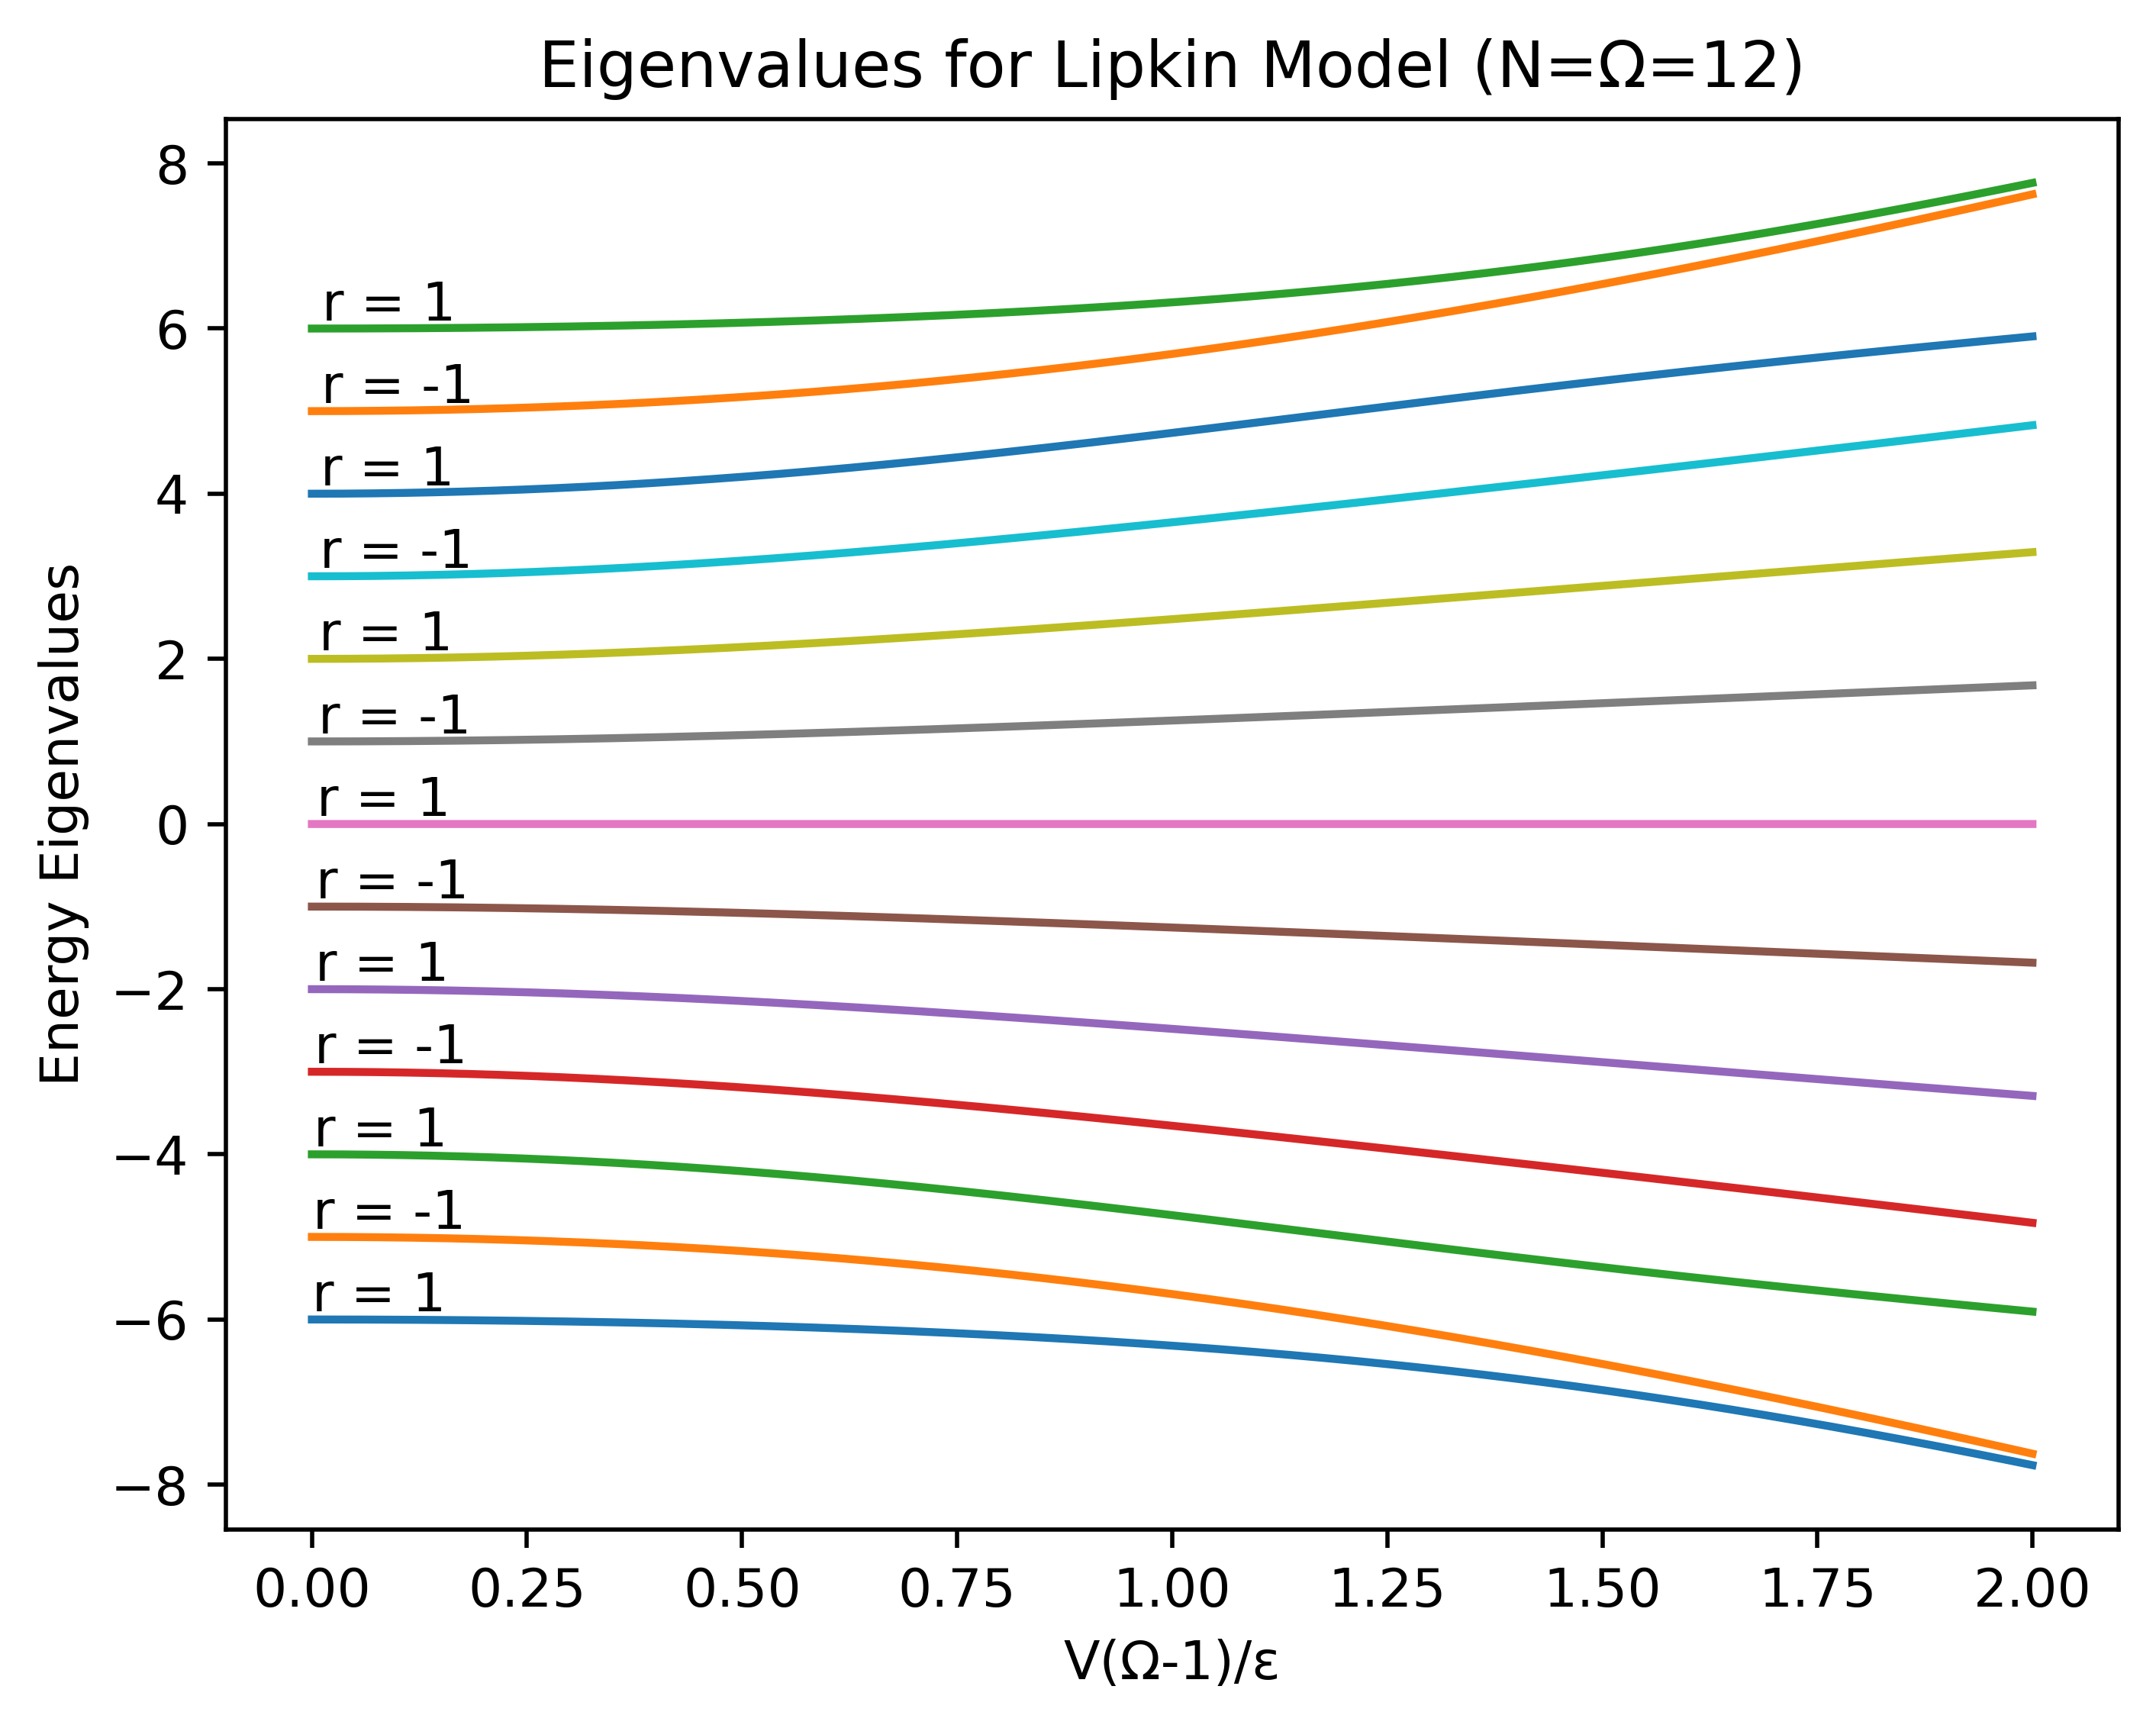

In [8]:
fig = plt.figure(dpi=500)
plt.plot(V*(Ω-1)/ε,eigs)
plt.title(r"Eigenvalues for Lipkin Model (N=Ω=12)")
plt.ylabel(r"Energy Eigenvalues")
plt.xlabel(r"V(Ω-1)/ε")

for n in range(len(r)):
	plt.annotate(
		f"r = {r[n]}",
		((V*(Ω-1)/ε)[n],eigs[0,n]+0.1),
	)

plt.show()

1.73205


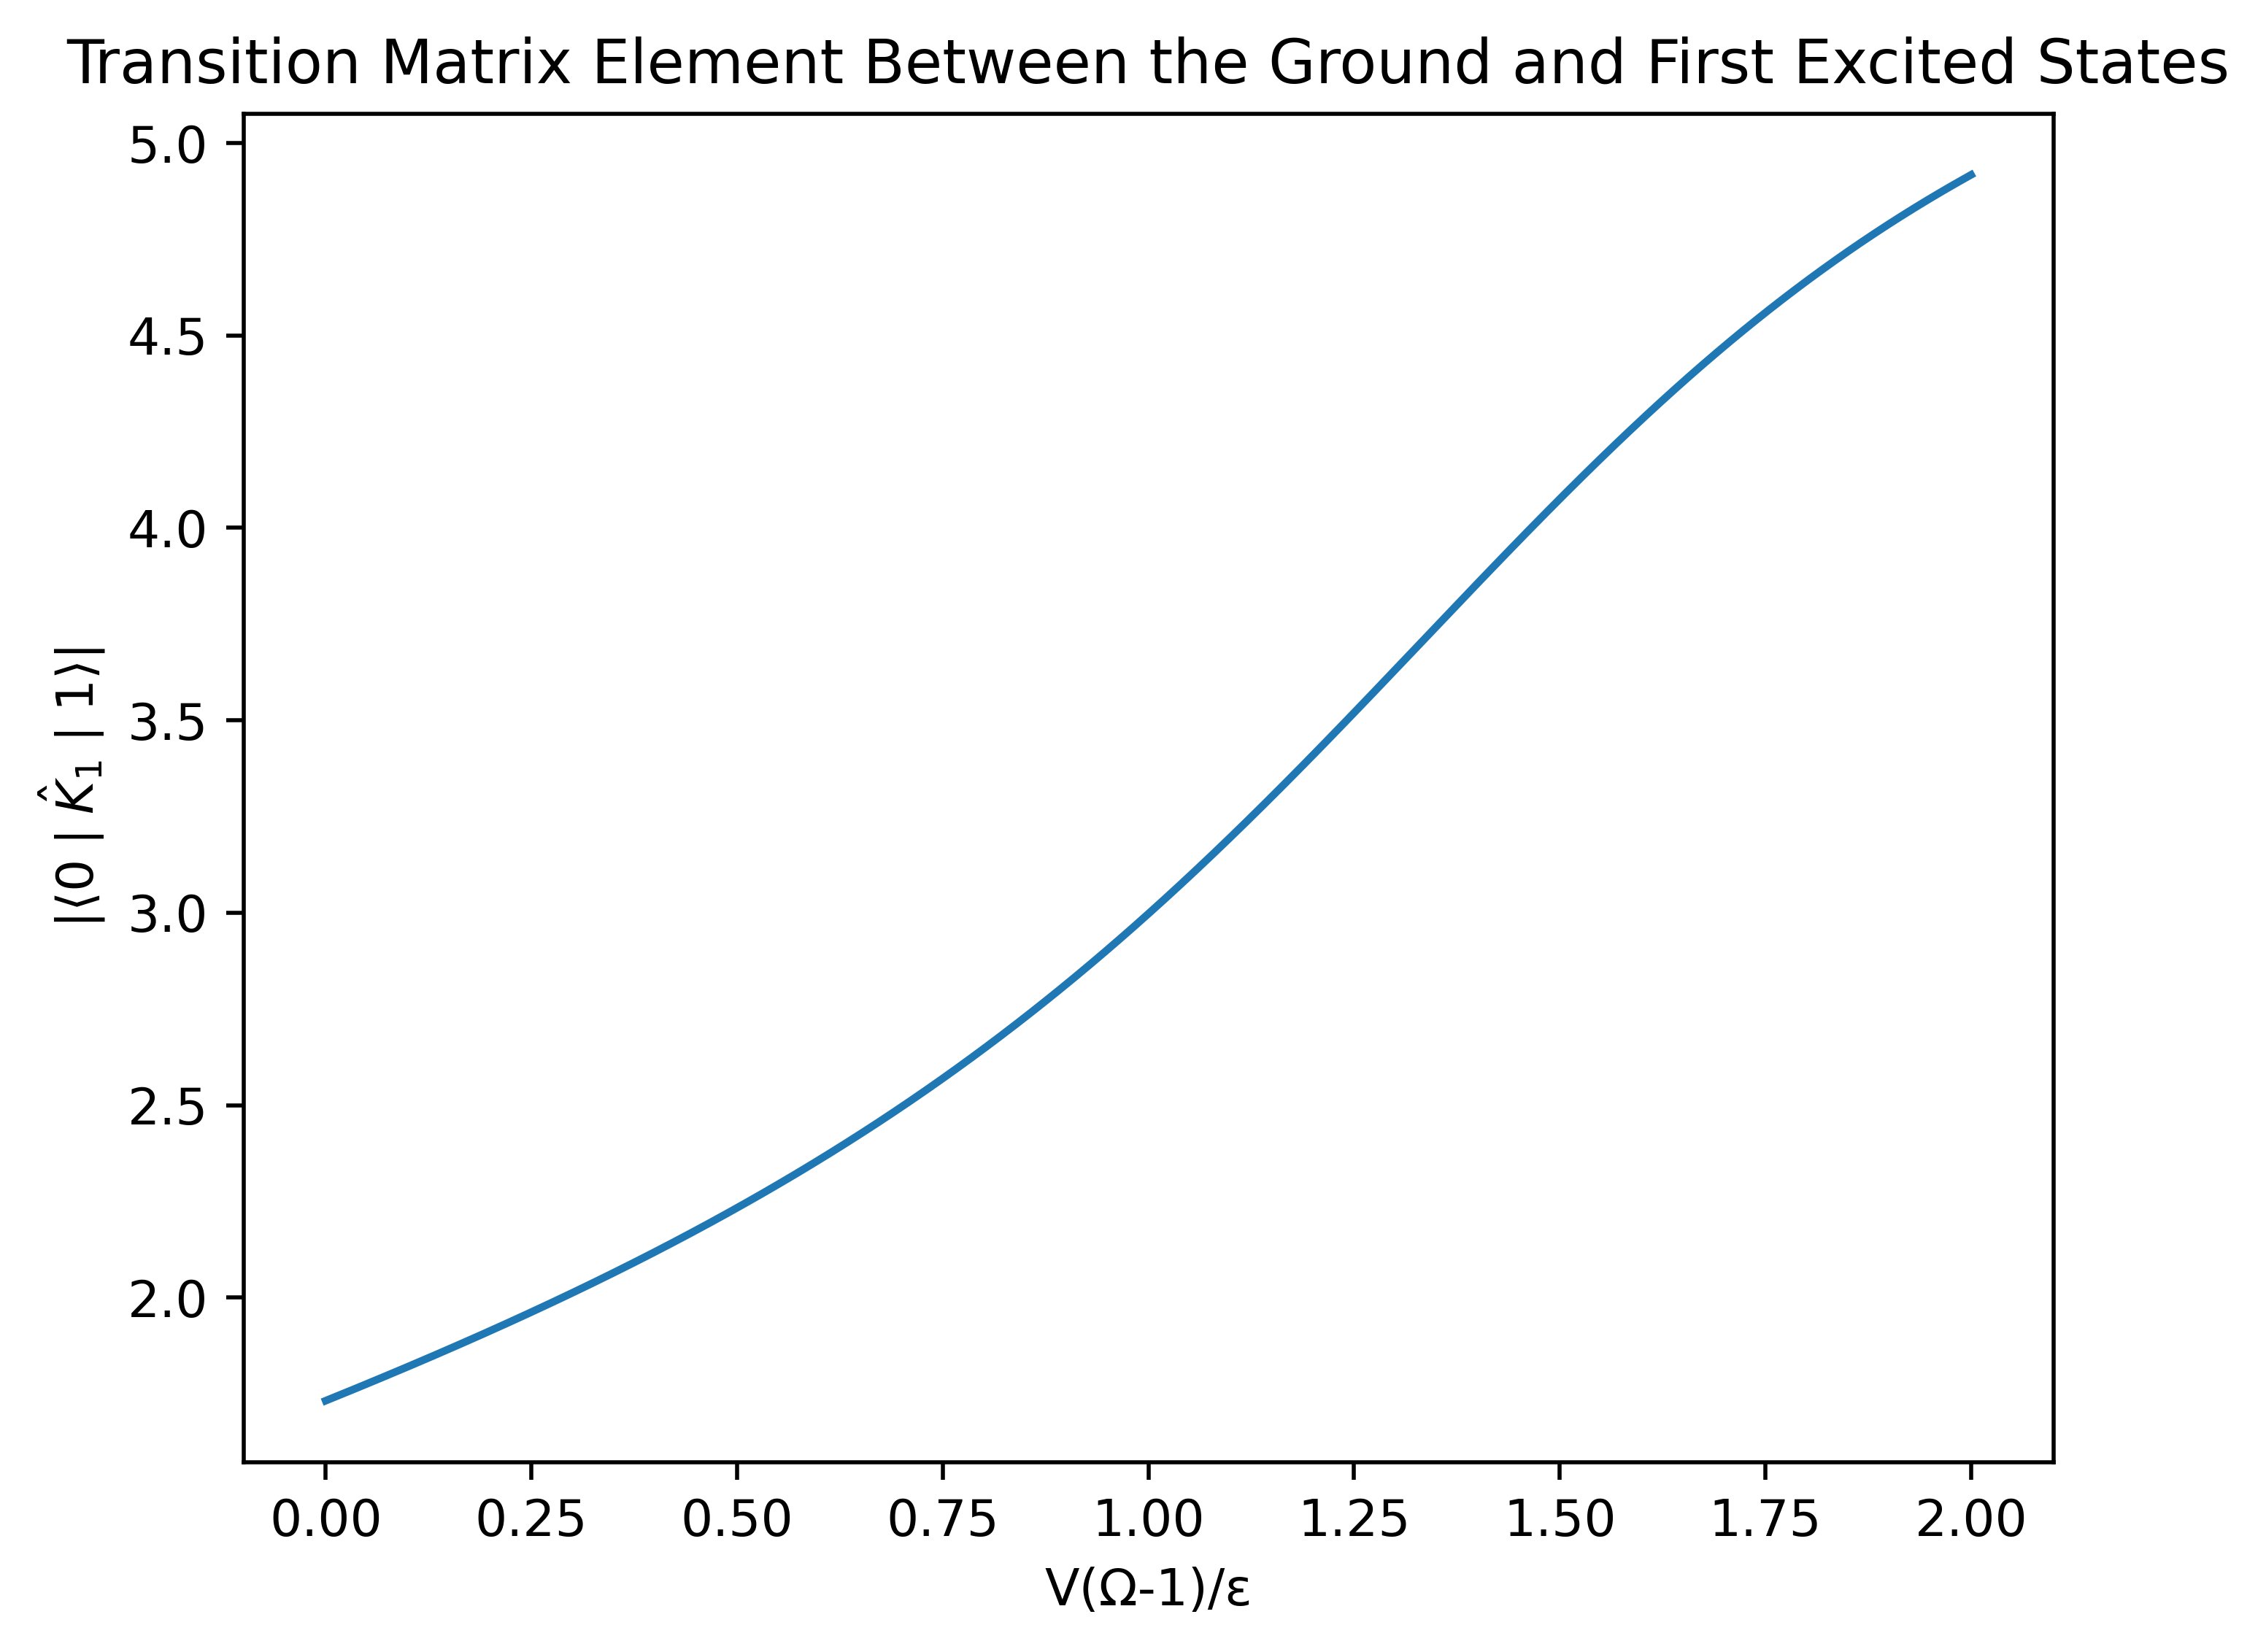

In [65]:
K_1 = 0.5*(K_p+K_m)

ev = [eigv[0,:,0]@K_1@eigv[0,:,1]]
for n in range(1,len(V)):
	ev.append(eigv[n,:,0]@K_1@eigv[n,:,1])


n = 0
v = 0
print((eigv[v,:,n]@K_1@eigv[v,:,n+1]).round(5))
fig = plt.figure(dpi=500)
plt.plot(V*(Ω-1)/ε,np.abs(ev))
plt.title(r"Transition Matrix Element Between the Ground and First Excited States")
plt.ylabel(r"$|\langle 0\mid\hat{K}_1\mid 1\rangle|$")
plt.xlabel(r"V(Ω-1)/ε")
plt.show()